# 한 종목에 대한 analysis 진행 - Weekly

In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import datetime
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('grade3')
sid = SentimentIntensityAnalyzer()

c:\users\wnsvy\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [41]:
stock_data = pd.read_csv('stock_price.csv', index_col=0)
stock_data.index = pd.Series(stock_data.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
stock_data.head()

,A000270,A003490,A035720,A051910,A068270
date,,,,,
2017-06-07,38850.0,37400.0,108425.0,290500.0,96910.4
2017-06-08,39150.0,37500.0,108927.0,289500.0,97793.2
2017-06-09,39000.0,37950.0,110232.0,292500.0,99460.6
2017-06-12,38950.0,37200.0,105413.0,289500.0,98087.4
2017-06-13,39200.0,37300.0,107321.0,292500.0,97989.3


In [42]:
code = '035720'

In [63]:
article = pd.read_csv('translated_' + code + '.csv',index_col=0)
article.index = pd.Series(article.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [67]:
article['en_title'].head(10)

2018-06-04 15:37:00    'Ground X' in Cacao, 'Social Impact' in a bloc...
2018-05-30 15:12:00    Line - Cacao - Two Trees - Hashid meet 'The Ne...
2018-05-29 15:34:00    Cacao to launch smart home ... IoT Platform 'K...
2018-05-29 15:20:00                                                     
2018-05-29 14:53:00    Cacao to enter smart home ... Launched 'Kakao ...
2018-05-29 11:15:00    Cacao Launches IoT Platform 'Kakao Home' in th...
2018-05-29 10:22:00                                                     
2018-05-29 14:29:00    Cacao to enter the smart home market ... 3Q se...
2018-05-29 13:28:00    Cacao to release smart home platform 'Kakao Ho...
2018-05-28 17:21:00                                                     
Name: en_title, dtype: object

In [45]:
article['2018-05-24 15:30' : '2018-05-25 15:30' ]

,title,Link,info,y_label,Contents
2018-05-25 09:49:00,지도앱 1위는 ‘구글’..1인당 사용시간 1위는 ‘카카오내비’,http://finance.naver.com/item/news_read.nhn?ar...,이데일리,0.0,구글과 네이버035420 텔레콤017670과 카카오035720가 4차 산업혁명의 기...
2018-05-25 04:03:00,"[빅데이터로 본 재테크] 카카오·멜론 합병, 엔터 지각변동에 쏠린 눈",http://finance.naver.com/item/news_read.nhn?ar...,매일경제,0.0,기대감 솔솔4차산업혁명 핵심 부품인 ·2차전지도 관심집중 지난 17일 카카오는 자회...
2018-05-24 16:09:00,"카카오, 블록체인 투자·지주社 '카카오G' 설립",http://finance.naver.com/item/news_read.nhn?ar...,이데일리,0.0,카카오035720가 올해 3월 글로벌 블록체인 사업 추진을 위한 투자·지주회사 ‘카...
2018-05-24 16:05:00,"비씨카드, '카카오T' 고객 대상 캐시백 이벤트",http://finance.naver.com/item/news_read.nhn?ar...,머니투데이,0.0,비씨카드는 카드사 단독으로 카카오모빌리티와 제휴를 맺고 ‘카카오 ’ 서비스 이용 고...


In [46]:
# 해당종목의 가격
close = stock_data['A' + code]

In [47]:
close.head()

date
2017-06-07    108425.0
2017-06-08    108927.0
2017-06-09    110232.0
2017-06-12    105413.0
2017-06-13    107321.0
Name: A035720, dtype: float64

In [48]:
score_df = pd.DataFrame(close)
score_df['score'] = 0
score_df.head()

,A035720,score
date,,
2017-06-07,108425.0,0
2017-06-08,108927.0,0
2017-06-09,110232.0,0
2017-06-12,105413.0,0
2017-06-13,107321.0,0


In [107]:
score_df['weekday'] = list(pd.Series(close.index).apply(lambda x : x.weekday()))
weekly_data = score_df[score_df['weekday']==0] # 0123456 월화수목금토일
weekly_data

,A035720,score,weekday
date,,,
2017-06-12,105413.0,0,0
2017-06-19,104209.0,0,0
2017-06-26,100595.0,0,0
2017-07-03,99791.4,0,0
2017-07-10,102000.0,0,0
2017-07-17,100500.0,0,0
2017-07-24,109000.0,0,0
2017-07-31,120000.0,0,0
2017-08-07,110500.0,0,0


In [78]:
sl=[]
for i in np.arange(len(friday.index[1:]))+1:
    score = 0
    start_time = friday.index[i-1] + pd.Timedelta('15 hours 30 min')
    start_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    end_time = friday.index[i] + pd.Timedelta('15 hours 30 min')
    end_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    title_data = article[start_time : end_time]['en_title']
    try:
        sentences = list(title_data)
        for sentence in sentences:
            ss=sid.polarity_scores(sentence)
            score += ss['compound']
        sl.append(score)
    except:
        sl.append(score)
        continue
    print(score)


8.334999999999999
3.1235
6.1766000000000005
7.749400000000001
0.768
5.8326
5.255299999999999
4.5447
10.267900000000001
3.1371
2.8122000000000007
9.2054
7.9202
6.983100000000001
4.7325
12.4375
2.9748
3.7474000000000003
2.2188
10.7933
3.8038000000000007
3.1517
3.9716999999999993
1.6960000000000002
9.7897
17.750799999999998
1.6596
9.133700000000003
1.4622999999999997
4.923899999999999
8.175
1.6949999999999998
1.1115000000000002
3.8634999999999997
-0.11739999999999987
7.623200000000002
3.6750000000000007
-3.5725
2.0232
5.4672
3.998899999999999
-1.5069999999999997
3.6557999999999997
2.3409
0.13149999999999995
1.2591999999999999


In [79]:
friday['score'].iloc[1:] = sl
friday

c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\wnsvy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,A035720,score,weekday
date,,,
2017-06-12,105413.0,0.0000,0
2017-06-19,104209.0,8.3350,0
2017-06-26,100595.0,3.1235,0
2017-07-03,99791.4,6.1766,0
2017-07-10,102000.0,7.7494,0
2017-07-17,100500.0,0.7680,0
2017-07-24,109000.0,5.8326,0
2017-07-31,120000.0,5.2553,0
2017-08-07,110500.0,4.5447,0


하루 데이터로 연습

In [80]:
article_data = article['2018-05-24 15:30' : '2018-05-25 15:30' ]

In [81]:
text = article_data['title']
text

2018-05-25 09:49:00        지도앱 1위는 ‘구글’..1인당 사용시간 1위는 ‘카카오내비’
2018-05-25 04:03:00    [빅데이터로 본 재테크] 카카오·멜론 합병, 엔터 지각변동에 쏠린 눈
2018-05-24 16:09:00                카카오, 블록체인 투자·지주社 '카카오G' 설립
2018-05-24 16:05:00                비씨카드, '카카오T' 고객 대상 캐시백 이벤트
Name: title, dtype: object

In [82]:
trans_text = text.apply(lambda x : translator.translate(x, dest='en').text)
trans_text

2018-05-25 09:49:00    The first place on the map app is 'Google' .. ...
2018-05-25 04:03:00    [Big Tech Data Technology] Merger of Cacao and...
2018-05-24 16:09:00    Cacao established block chain investment holdi...
2018-05-24 16:05:00           BC Card, 'Cacao T' Customer Cashback Event
Name: title, dtype: object

In [83]:
sentences = list(trans_text)
for sentence in sentences:
    print(sentence)
    ss=sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0} : {1},'.format(k,ss[k]),end='')
    print()

The first place on the map app is 'Google' .. First use time per person is 'Cacao navi'
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,
[Big Tech Data Technology] Merger of Cacao and Melon,
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,
Cacao established block chain investment holding company 'Cacao G'
compound : -0.4404,neg : 0.266,neu : 0.734,pos : 0.0,
BC Card, 'Cacao T' Customer Cashback Event
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,


In [84]:
sentences = list(trans_text)
score = 0
for sentence in sentences:
    ss=sid.polarity_scores(sentence)
    score += ss['compound']
score

-0.4404

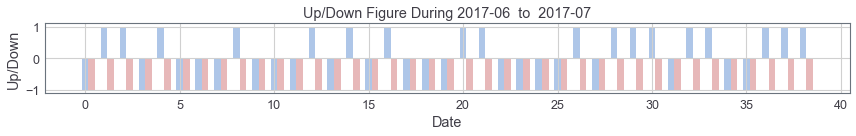

In [85]:
start_date = '2017-06'
end_date = '2017-07'
plot_up_down_figure(close,score_df['score'], start_date, end_date) # 주식데이터, 뉴스 스코어, 시작일, 끝일

# Result

In [86]:
friday.to_csv(code + 'weekly_result.csv')

In [87]:
def get_up_down(data):
    up_down = data.where(data>0)
    up_down[data.where(data>0).dropna().index] = 1
    up_down = up_down.fillna(-1)
    return up_down
    
def get_accuracy(data1,data2):
    up_down1 = get_up_down(data1.pct_change())
    # up_down1 = data1
    up_down2 = get_up_down(data2)
    
    valid = up_down1 + up_down2
    accuracy = len(valid.where(valid!=0).dropna()) / len(valid)
    return accuracy

카카오 정확도

In [88]:
friday.head()

,A035720,score,weekday
date,,,
2017-06-12,105413.0,0.0000,0
2017-06-19,104209.0,8.3350,0
2017-06-26,100595.0,3.1235,0
2017-07-03,99791.4,6.1766,0
2017-07-10,102000.0,7.7494,0


In [89]:
get_accuracy(friday.iloc[:,0],friday.iloc[:,1])

0.5106382978723404

카카오 0.5245901639344263

기아차 0.5204918032786885

셀트리온 0.5204918032786885

LG화학 0.5491

대한항공 0.4959016393442623

In [152]:
score = pd.read_csv('068270result.csv',index_col=0)
price = stock_data['A068270']
df = pd.concat([price,score],ignore_index=True, axis=1)
get_accuracy(df.iloc[:,0],df.iloc[:,1])

0.5204918032786885

## Plot Stock UP/Down

In [12]:
def plot_up_down_figure(data1,data2,start_date,end_date):
    fig, ax = plt.subplots(figsize=(12,2))

    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.7'}
    

    pcc = data1.pct_change()
    up_down1 = pcc.where(pcc>0)
    up_down1[pcc.where(pcc>0).dropna().index] = 1
    up_down1 = up_down1.fillna(-1)
    up_down1 = up_down1[start_date:end_date]

    
    pcc = data2
    up_down2 = pcc.where(pcc>0)
    up_down2[pcc.where(pcc>0).dropna().index] = 1
    up_down2 = up_down2.fillna(-1)
    up_down2 = up_down2[start_date:end_date]

    
    index = np.arange(len(up_down1.index))

    rects1 = ax.bar(index, list(up_down1), bar_width,
                    alpha=opacity, color='b',
                    error_kw=error_config,
                    label='News')


    rects2 = ax.bar(index+bar_width, list(up_down2), bar_width,
                    alpha=opacity, color='r',
                    error_kw=error_config,
                    label='Stock')


    ax.set_xlabel('Date')
    ax.set_ylabel('Up/Down')
    ax.set_title('Up/Down Figure During ' + start_date + '  to  ' + end_date)
    # ax.legend()

    fig.tight_layout()
    plt.show()

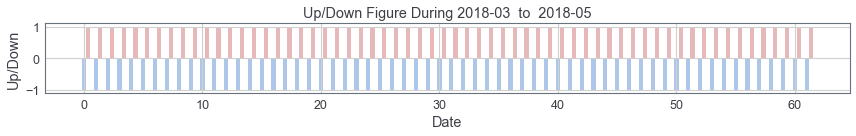

In [14]:
start_date = '2018-03'
end_date = '2018-05'
plot_up_down_figure(close,close, start_date, end_date) # 가격, score, 시작일, 끝일

In [97]:
def get_up_down(data):
    up_down = data.where(data>0)
    up_down[data.where(data>0).dropna().index] = 1
    up_down = up_down.fillna(-1)
    return up_down

def get_accuracy(data1,data2):
    up_down1 = get_up_down(data1.pct_change())
    # up_down1 = data1
    up_down2 = get_up_down(data2)

    valid = up_down1 + up_down2
    accuracy = len(valid.where(valid!=0).dropna()) / len(valid)
    return accuracy

def weekly_result(code,week_day):
    article = pd.read_csv('translated_' + code + '.csv',index_col=0)
    article.index = pd.Series(article.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    # 해당종목의 가격
    close = stock_data['A' + code]
    score_df = pd.DataFrame(close)
    score_df['score'] = 0
    score_df['weekday'] = list(pd.Series(close.index).apply(lambda x : x.weekday()))
    weekly_data = score_df[score_df['weekday']==week_day]
    sl=[]
    for i in np.arange(len(weekly_data.index[1:]))+1:
        score = 0
        start_time = weekly_data.index[i-1] + pd.Timedelta('15 hours 30 min')
        start_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
        end_time = weekly_data.index[i] + pd.Timedelta('15 hours 30 min')
        end_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
        title_data = article[start_time : end_time]['en_title']
        try:
            sentences = list(title_data)
            for sentence in sentences:
                ss=sid.polarity_scores(sentence)
                score += ss['compound']
            sl.append(score)
        except:
            sl.append(score)
            continue
        

    weekly_data['score'].iloc[1:] = sl
    weekly_data.to_csv(code + 'weekly_result.csv')

    return get_accuracy(weekly_data.iloc[:,0],weekly_data.iloc[:,1])

In [102]:
stock_list = ['000270','003490','035720','051910','068270']

In [106]:
for i in stock_list:
    print('Weekly Result for ',i)
    rate = 0
    for j in range(5):
        score = weekly_result(i,j)
        print(score)
        rate += score
    print('Average Prediction Percentage : ',rate/5)

Weekly Result for  000270


c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\wnsvy\anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.48936170212765956
0.5833333333333334
0.5294117647058824
0.6326530612244898
0.5510204081632653
Average Prediction Percentage :  0.5571560539109262
Weekly Result for  003490
0.46808510638297873
0.4791666666666667
0.5294117647058824
0.5918367346938775
0.46938775510204084
Average Prediction Percentage :  0.5075776055102892
Weekly Result for  035720
0.5106382978723404
0.5625
0.5490196078431373
0.4897959183673469
0.42857142857142855
Average Prediction Percentage :  0.5081050505308505
Weekly Result for  051910
0.5957446808510638
0.5625
0.5294117647058824
0.42857142857142855
0.5306122448979592
Average Prediction Percentage :  0.5293680238052667
Weekly Result for  068270
0.5531914893617021
0.5625
0.5490196078431373
0.5714285714285714
0.5510204081632653
Average Prediction Percentage :  0.5574320153593353


In [100]:
weekly_result('000270',2)

c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\wnsvy\anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.5294117647058824